<a href="https://colab.research.google.com/github/amitvashista/nifty_50/blob/main/nifty_50_data_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# install library

In [ ]:
# ! pip install schedule

In [2]:
!pip install openpyxl

In [3]:
!pip install yfinance

In [4]:
!pip install matplotlib

# code

In [5]:
from datetime import datetime
# import schedule
import time
# Get today's Get
today_date = datetime.today().strftime('%Y-%m-%d')
# today_date = datetime.today().strftime('%Y-%m-%d')
print(today_date)

2025-02-22


In [6]:
import requests
import pandas as pd

def get_nifty_option_chain():
    url = "https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    session = requests.Session()
    session.get("https://www.nseindia.com", headers=headers)  # Required to get cookies

    response = session.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        records = data['records']['data']

        CE_options = []
        PE_options = []
        for record in records:

            if ("CE" in record) :
            # if ("CE" in record):
                # print(record)
                # options2 =pd.DataFrame(record)
                CE_options.append({
                    "Strike Price": record["CE"]["strikePrice"],
                    "CE expiryDate": record["CE"]["expiryDate"],
                    "CE openInterest": record["CE"]["openInterest"],
                    "CE changeinOpenInterest": record["CE"]["changeinOpenInterest"],
                    "CE pchangeinOpenInterest": record["CE"]["pchangeinOpenInterest"],
                    "CE totalTradedVolume": record["CE"]["totalTradedVolume"],
                    "CE Open impliedVolatility": record["CE"]["impliedVolatility"],
                    "CE lastPrice": record["CE"]["lastPrice"],
                    "CE change": record["CE"]["change"],
                    "CE pChange": record["CE"]["pChange"],
                    "CE totalBuyQuantity": record["CE"]["totalBuyQuantity"],
                    "CE totalSellQuantity": record["CE"]["totalSellQuantity"],
                    "CE bidQty": record["CE"]["bidQty"],
                    "CE bidprice": record["CE"]["bidprice"],
                    "CE askQty": record["CE"]["askQty"],
                    "CE askPrice": record["CE"]["askPrice"],
                    "CE underlyingValue": record["CE"]["underlyingValue"]
                })
            if ("PE" in record):
                PE_options.append({
                    "Strike Price": record["PE"]["strikePrice"],
                    "PE expiryDate": record["PE"]["expiryDate"],
                    "PE Open Interest": record["PE"]["openInterest"],
                    "PE changeinOpenInterest": record["PE"]["changeinOpenInterest"],
                    "PE pchangeinOpenInterest": record["PE"]["pchangeinOpenInterest"],
                    "PE totalTradedVolume": record["PE"]["totalTradedVolume"],
                    "PE impliedVolatility": record["PE"]["impliedVolatility"],
                    "PE lastPrice": record["PE"]["lastPrice"],
                    "PE change": record["PE"]["change"],
                    "PE pChange": record["PE"]["pChange"],
                    "PE totalBuyQuantity": record["PE"]["totalBuyQuantity"],
                    "PE totalSellQuantity": record["PE"]["totalSellQuantity"],
                    "PE bidQty": record["PE"]["bidQty"],
                    "PE bidprice": record["PE"]["bidprice"],
                    "PE askQty": record["PE"]["askQty"],
                    "PE askPrice": record["PE"]["askPrice"],
                    "PE underlyingValue": record["PE"]["underlyingValue"]
                })

        # df = pd.DataFrame(options)
        # df=df[(df['Strike Price']>23000) & (df['Strike Price']<24000)]
        return pd.DataFrame(CE_options), pd.DataFrame(PE_options)
    else:
        print("Failed to fetch data")

nifty_CE_option_data,nifty_PE_option_data=get_nifty_option_chain()


In [7]:
nifty_CE_option_data

,Strike Price,CE expiryDate,CE openInterest,CE changeinOpenInterest,CE pchangeinOpenInterest,CE totalTradedVolume,CE Open impliedVolatility,CE lastPrice,CE change,CE pChange,CE totalBuyQuantity,CE totalSellQuantity,CE bidQty,CE bidprice,CE askQty,CE askPrice,CE underlyingValue
0,17000,24-Dec-2025,9.333333,0.0,0.000000,0,0.00,7010.00,0.00,0.000000,75,0,75,5951.00,0,0.00,22795.9
1,18000,27-Mar-2025,6109.000000,-2.0,-0.032728,89,0.00,4903.90,-125.95,-2.504051,4425,4875,75,4865.95,75,4899.90,22795.9
2,18000,26-Jun-2025,31.333333,0.0,0.000000,0,0.00,5700.00,0.00,0.000000,1875,150,75,4485.30,75,5893.30,22795.9
3,18000,24-Dec-2025,125.000000,0.0,0.000000,0,0.00,5700.00,0.00,0.000000,150,0,75,5300.00,0,0.00,22795.9
4,19000,27-Mar-2025,650.333333,-17.0,-2.547453,50,0.00,3910.00,-137.30,-3.392385,6825,5775,75,3900.00,75,3919.95,22795.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,30000,27-Mar-2025,5703.333333,80.0,1.422644,1966,33.36,3.80,0.05,1.333333,43575,9375,10350,3.40,900,3.95,22795.9
628,30000,26-Jun-2025,400.000000,81.0,25.391850,92,18.52,12.90,0.80,6.611570,87300,4800,75,12.20,150,13.45,22795.9
629,30000,24-Dec-2025,732.000000,34.0,4.871060,163,12.86,65.30,-2.30,-3.402367,12525,2475,900,65.25,75,68.95,22795.9
630,31000,27-Mar-2025,31966.333333,5676.0,21.589684,7209,36.85,3.70,0.05,1.369863,136950,72075,4500,3.70,3075,3.80,22795.9


In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime

# Define the strike price and expiry
strike_price = 23650  # Modify as needed
expiry_date = "15-Feb-2024"  # Update based on current expiry
stop_time = time.time() + 60*1
# Function to fetch Nifty 50 Option Chain data from NSE

df_nifty_CE_option_data = pd.DataFrame()
df_nifty_PE_option_data = pd.DataFrame()

while time.time() < stop_time:
  try:
      nifty_CE_option_data,nifty_PE_option_data = get_nifty_option_chain()

      # Append new data to respective DataFrames
      df_nifty_CE_option_data = pd.concat([df_nifty_CE_option_data, nifty_CE_option_data], ignore_index=True)
      df_nifty_PE_option_data = pd.concat([df_nifty_PE_option_data, nifty_PE_option_data], ignore_index=True)

      time.sleep(1)  # Fetch data every second
  except:
      time.sleep(1)
  # option_data_list=pd.DataFrame(option_data_list)
  # option_data_list.to_csv("nifty_option_data.csv", index=False)





In [ ]:
df_nifty_CE_option_data = df_nifty_CE_option_data.drop_duplicates()
df_nifty_PE_option_data = df_nifty_PE_option_data.drop_duplicates()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price                       Close          High           Low          Open  \
Ticker                      ^NSEI         ^NSEI         ^NSEI         ^NSEI   
Datetime                                                                      
2025-02-21 09:15:00  22884.150391  22885.699219  22855.800781  22885.699219   

Price               Volume Sequence  
Ticker               ^NSEI           
Datetime                             
2025-02-21 09:15:00      0        1  


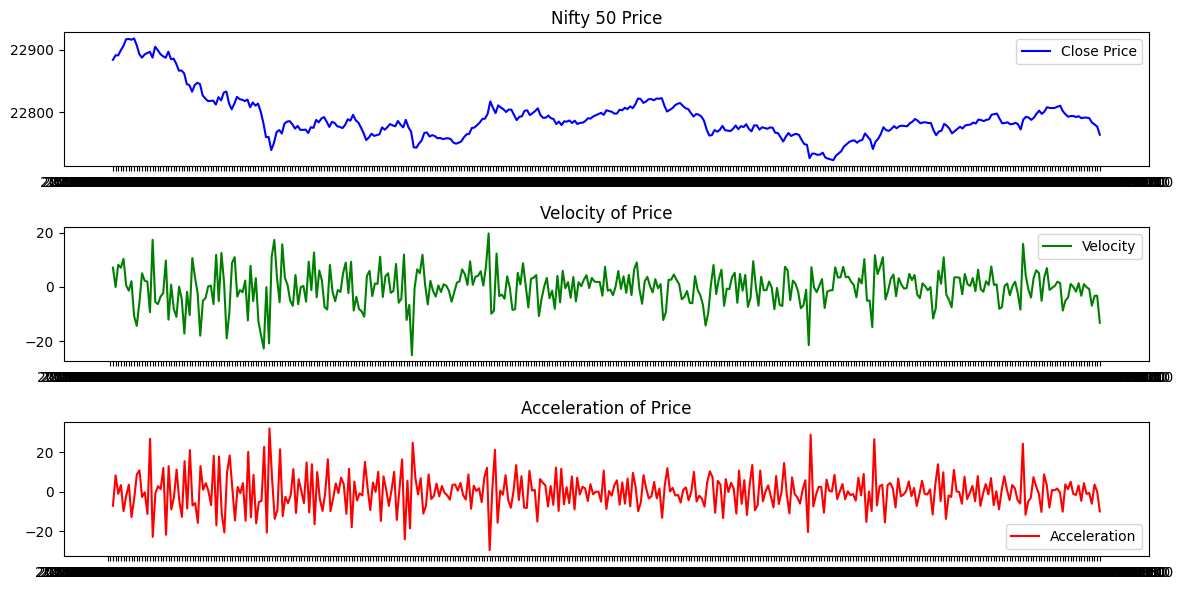

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz

def get_nifty50_data(interval='1m', period='1d'):
    """Fetch Nifty 50 second or minute-based data from Yahoo Finance."""
    nifty = '^NSEI'  # Nifty 50 Index ticker
    data = yf.download(nifty, interval=interval, period=period)

    # Convert datetime index to Indian Standard Time (IST)
    ist = pytz.timezone('Asia/Kolkata')
    data.index = data.index.tz_convert(ist).strftime('%Y-%m-%d %H:%M:%S')

    data['Sequence'] = range(1, len(data) + 1)  # Assign sequence numbers
    return data

def calculate_acceleration(data):
    """Calculate velocity and acceleration of Nifty 50 price."""
    data['Velocity'] = data['Close'].diff()  # First derivative (Price Change per time unit)
    data['Acceleration'] = data['Velocity'].diff()  # Second derivative (Change in velocity)
    return data

def plot_acceleration(data):
    """Plot closing price, velocity, and acceleration."""
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('Nifty 50 Price')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(data.index, data['Velocity'], label='Velocity', color='green')
    plt.title('Velocity of Price')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(data.index, data['Acceleration'], label='Acceleration', color='red')
    plt.title('Acceleration of Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    interval = '1m'  # '1m' for minute data, '1s' not available on Yahoo Finance
    period = '1d'  # Fetch data for 1 day
    data = get_nifty50_data(interval, period)
    print(data.head(1))
    data_acceleration = calculate_acceleration(data)
    plot_acceleration(data_acceleration)

In [ ]:
# Convert price-related columns to numeric, handling errors
data = data.iloc[2:].reset_index()  # Remove non-data header rows
numeric_cols = ["Open", "High", "Low", "Close", "Volume", "Velocity", "Acceleration"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Summary statistics for numerical columns
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Identify significant acceleration changes (outliers using IQR)
Q1 = data["Acceleration"].quantile(0.25)
Q3 = data["Acceleration"].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data["Acceleration"] < (Q1 - 1.5 * IQR)) | (data["Acceleration"] > (Q3 + 1.5 * IQR))]

# Check for trends in acceleration over time
data["Acceleration_MA"] = data["Acceleration"].rolling(window=10, min_periods=1).mean()

missing_values, outliers.shape


In [ ]:
file_path_CE = f"/content/drive/MyDrive/nifty_50/NiftyOptionCE_{today_date}_1.xlsx"
file_path_PE=f"/content/drive/MyDrive/nifty_50/NiftyOptionPE_{today_date}_1.xlsx"

df_nifty_CE_option_data.to_excel(file_path_CE, index=False)
df_nifty_PE_option_data.to_excel(file_path_PE, index=False)
data.to_excel(f"/content/drive/MyDrive/nifty_50/Nifty_{today_date}_1.xlsx")
print(f"Data saved at: {file_path_CE}")


In [ ]:
df_nifty_CE_option_data.to_excel(f'NiftyOptionCE_{today_date}.xlsx', index=False)
df_nifty_PE_option_data.to_excel(f'NiftyOptionPE_{today_date}.xlsx', index=False)
data.to_excel(f"Nifty_{today_date}_1.xlsx")
print(f"Data saved at: {file_path_CE}")


NameError: name 'df_nifty_CE_option_data' is not defined